In [ ]:
!pip install ucimlrepo

## Load Wine dataset using UCI repo

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo
from tensorflow.keras.utils import plot_model

# Fetch dataset
wine = fetch_ucirepo(id=109)

# Data (as pandas dataframes)
features = wine.data.features
targets = wine.data.targets

# Convert pandas DataFrame and Series to NumPy arrays
features = features.to_numpy()
targets = targets.to_numpy()

# Split the data into training and validation sets
train_features, val_features, train_targets, val_targets = train_test_split(features, targets, test_size=0.3, random_state=65)

print("原始資料:")
print(train_features[0])
print(train_targets[0])

# Normalize the data using training set statistics
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
val_features = scaler.transform(val_features)

print("經過正規化過後:")
print(train_features[0])

# Convert target labels to categorical format
train_targets = keras.utils.to_categorical(train_targets)
val_targets = keras.utils.to_categorical(val_targets)

print("經過one-hot編碼過後之targets:")
print(train_targets[0])

原始資料:
[1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
 3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]
[1]
經過正規化過後:
[ 0.33265684  0.17508514  1.83046465  0.50970596  1.20443578  0.84935592
  0.64548727  0.1940612   0.37881534 -0.31057933  0.39679621  0.48653082
 -0.06278438]
經過one-hot編碼過後之targets:
[0. 1. 0. 0.]


## Build a classification model

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 1)                   │              14 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │               4 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 4)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30 (120.00 B)

 Trainable params: 30 (120.00 B)

 Non-trainable params: 0 (0.00 B)


模型架構圖:


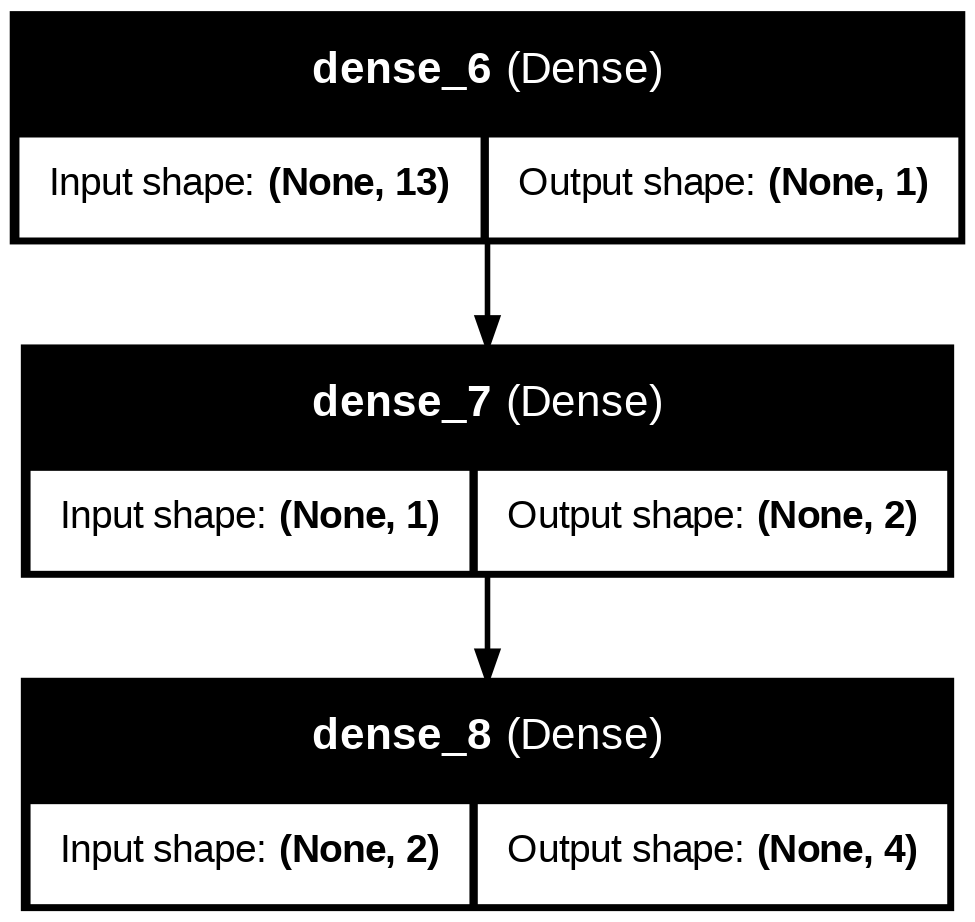

In [ ]:
# Build model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(train_features.shape[1],)),
    tf.keras.layers.Dense(1, activation='tanh'),
    tf.keras.layers.Dense(2, activation='tanh'),
    tf.keras.layers.Dense(train_targets.shape[1], activation='softmax')
])
model.summary()

# Visualization
print("\n模型架構圖:")
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

## Compile and Train the model with Adam

In [ ]:
# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(0.01),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Train the model with class_weight argument
history = model.fit(
    train_features,
    train_targets,
    epochs=50,
    verbose=2,
    validation_data=(val_features, val_targets),
)

Epoch 1/50
4/4 - 2s - 436ms/step - accuracy: 0.1452 - loss: 1.4183 - val_accuracy: 0.2407 - val_loss: 1.3763
Epoch 2/50
4/4 - 0s - 14ms/step - accuracy: 0.3065 - loss: 1.3587 - val_accuracy: 0.2963 - val_loss: 1.3262
Epoch 3/50
4/4 - 0s - 38ms/step - accuracy: 0.3065 - loss: 1.3073 - val_accuracy: 0.5185 - val_loss: 1.2800
Epoch 4/50
4/4 - 0s - 33ms/step - accuracy: 0.5645 - loss: 1.2573 - val_accuracy: 0.5926 - val_loss: 1.2351
Epoch 5/50
4/4 - 0s - 35ms/step - accuracy: 0.5968 - loss: 1.2081 - val_accuracy: 0.5556 - val_loss: 1.1911
Epoch 6/50
4/4 - 0s - 15ms/step - accuracy: 0.5968 - loss: 1.1590 - val_accuracy: 0.5556 - val_loss: 1.1487
Epoch 7/50
4/4 - 0s - 15ms/step - accuracy: 0.5968 - loss: 1.1135 - val_accuracy: 0.5556 - val_loss: 1.1076
Epoch 8/50
4/4 - 0s - 19ms/step - accuracy: 0.5968 - loss: 1.0698 - val_accuracy: 0.5556 - val_loss: 1.0688
Epoch 9/50
4/4 - 0s - 34ms/step - accuracy: 0.5968 - loss: 1.0290 - val_accuracy: 0.5556 - val_loss: 1.0313
Epoch 10/50
4/4 - 0s - 34ms

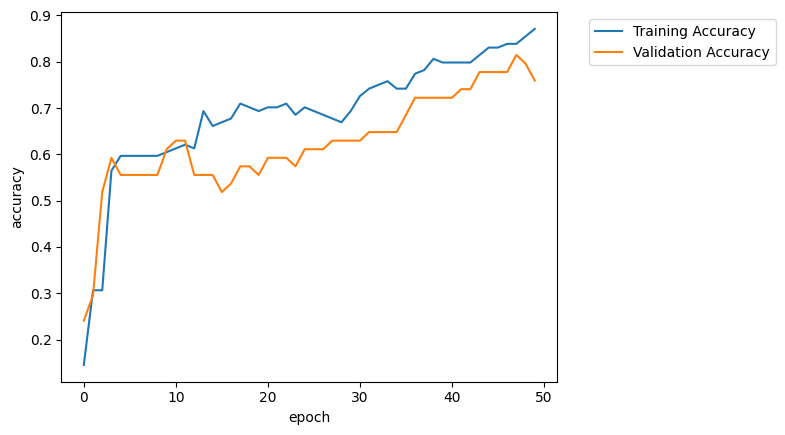

In [ ]:
plt.plot(history.history["accuracy"],label="Training Accuracy")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

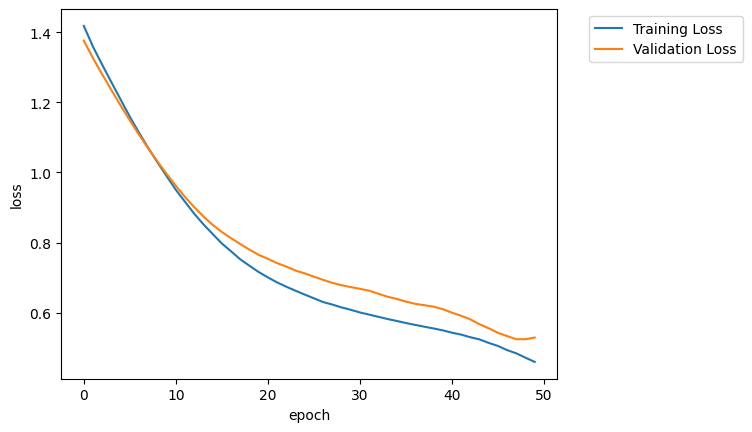

In [ ]:
plt.plot(history.history["loss"],label="Training Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

## Print out first weights and biases of layers

In [ ]:
for layer in model.layers:
  weights, biases = layer.get_weights()
  print(f"\nLayer: {layer.name}")
  print(f"Weights shape: {weights.shape}")
  print(f"Weights: {weights}")
  print(f"Biases shape: {biases.shape}")
  print(f"Biases: {biases}")


Layer: dense_6
Weights shape: (13, 1)
Weights: [[-0.17801486]
 [ 0.05926419]
 [ 0.0547821 ]
 [ 0.37859645]
 [ 0.06671964]
 [ 0.02552938]
 [-1.0223068 ]
 [-0.32867625]
 [ 0.13516682]
 [-0.14337876]
 [-0.36146477]
 [-0.42309391]
 [-0.19086586]]
Biases shape: (1,)
Biases: [-0.67854816]

Layer: dense_7
Weights shape: (1, 2)
Weights: [[1.3401511 2.0762146]]
Biases shape: (2,)
Biases: [ 0.65839267 -0.71017087]

Layer: dense_8
Weights shape: (2, 4)
Weights: [[-1.5251846  -1.7618788   0.09832666  0.7415532 ]
 [ 0.68382823 -1.6169633  -1.8324469   0.87961197]]
Biases shape: (4,)
Biases: [-0.93872476  0.4795552   0.7773444   0.43268976]


## Gradient and Parameters output of every epochs

In [ ]:
# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(0.01),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
gradients = [] # Record gradients

# setting optimizer and loss function
optimizer = keras.optimizers.Adam(0.01)
loss_fn = tf.keras.losses.CategoricalCrossentropy()

# Run for 5 epochs
for epoch in range(5):
    #print(f"Epoch {epoch + 1}/{epochs}")
    with tf.GradientTape() as tape:
        # training model to get predictions
        predictions = model(train_features, training=True)
        # compute loss based on predictions
        loss_value = loss_fn(train_targets, predictions)

    # back propagation to get gradients
    grads = tape.gradient(loss_value, model.trainable_variables)
    # update model parameters
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Gradients record
    gradients.append(grads)

    # Print weights and biases for each layer
    for layer in model.layers:
        weights, biases = layer.get_weights()
        print(f"\nWeights and Biases at epoch {epoch + 1}:")
        print(f"\nLayer: {layer.name}")
        print(f"Weights shape: {weights.shape}")
        print(f"Weights: {weights}")
        print(f"Biases shape: {biases.shape}")
        print(f"Biases: {biases}")

# Print gradients for each epoch
for i, grads in enumerate(gradients):
    print(f"\nGradients at epoch {i + 1}:")
    for grad in grads:
        print(grad.numpy())


Weights and Biases at epoch 1:

Layer: dense
Weights shape: (13, 1)
Weights: [[-0.2343647 ]
 [-0.17577957]
 [-0.0834879 ]
 [-0.42822084]
 [-0.35110062]
 [ 0.33724347]
 [ 0.07821463]
 [-0.30924073]
 [ 0.19231932]
 [-0.4206736 ]
 [ 0.94478506]
 [ 0.38020846]
 [-0.13939528]]
Biases shape: (1,)
Biases: [0.78918475]

Weights and Biases at epoch 1:

Layer: dense_1
Weights shape: (1, 2)
Weights: [[-1.9699396  1.7747592]]
Biases shape: (2,)
Biases: [-0.07323004  0.49281788]

Weights and Biases at epoch 1:

Layer: dense_2
Weights shape: (2, 4)
Weights: [[ 0.3459261  -1.266321   -0.27496916  2.0979052 ]
 [-1.0633303   0.3033369   1.167624   -1.915849  ]]
Biases shape: (4,)
Biases: [-0.8971026   0.39735878  0.5453233   0.80727726]

Weights and Biases at epoch 2:

Layer: dense
Weights shape: (13, 1)
Weights: [[-0.22512288]
 [-0.17817442]
 [-0.07703748]
 [-0.42153493]
 [-0.36051735]
 [ 0.34702215]
 [ 0.08817551]
 [-0.30004406]
 [ 0.19888613]
 [-0.43035817]
 [ 0.9535367 ]
 [ 0.38911146]
 [-0.129446

## Train the model with Adagrad

In [ ]:
# Compile the model
model.compile(
    optimizer=keras.optimizers.Adagrad(0.01),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Train the model with class_weight argument
history = model.fit(
    train_features,
    train_targets,
    epochs=50,
    verbose=2,
    validation_data=(val_features, val_targets),
)

Epoch 1/50
4/4 - 1s - 262ms/step - accuracy: 0.8710 - loss: 0.4491 - val_accuracy: 0.7593 - val_loss: 0.5276
Epoch 2/50
4/4 - 0s - 92ms/step - accuracy: 0.8629 - loss: 0.4469 - val_accuracy: 0.7593 - val_loss: 0.5264
Epoch 3/50
4/4 - 0s - 31ms/step - accuracy: 0.8710 - loss: 0.4448 - val_accuracy: 0.7593 - val_loss: 0.5256
Epoch 4/50
4/4 - 0s - 20ms/step - accuracy: 0.8629 - loss: 0.4437 - val_accuracy: 0.7593 - val_loss: 0.5247
Epoch 5/50
4/4 - 0s - 34ms/step - accuracy: 0.8710 - loss: 0.4418 - val_accuracy: 0.7593 - val_loss: 0.5238
Epoch 6/50
4/4 - 0s - 35ms/step - accuracy: 0.8710 - loss: 0.4399 - val_accuracy: 0.7593 - val_loss: 0.5229
Epoch 7/50
4/4 - 0s - 40ms/step - accuracy: 0.8710 - loss: 0.4383 - val_accuracy: 0.7593 - val_loss: 0.5220
Epoch 8/50
4/4 - 0s - 32ms/step - accuracy: 0.8710 - loss: 0.4369 - val_accuracy: 0.7593 - val_loss: 0.5206
Epoch 9/50
4/4 - 0s - 32ms/step - accuracy: 0.8790 - loss: 0.4359 - val_accuracy: 0.7593 - val_loss: 0.5195
Epoch 10/50
4/4 - 0s - 23ms

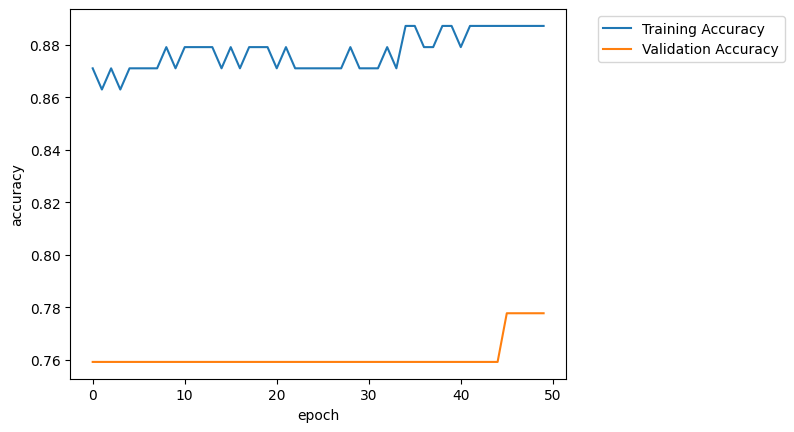

In [ ]:
plt.plot(history.history["accuracy"],label="Training Accuracy")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

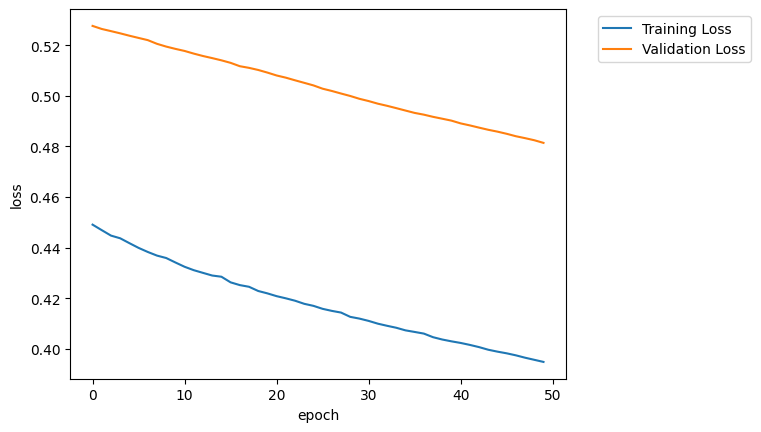

In [ ]:
plt.plot(history.history["loss"],label="Training Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

## Train the model with RMSprop

In [ ]:
# Compile the model
model.compile(
    optimizer=keras.optimizers.RMSprop(0.01),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Train the model with class_weight argument
history = model.fit(
    train_features,
    train_targets,
    epochs=50,
    verbose=2,
    validation_data=(val_features, val_targets),
)

Epoch 1/50
4/4 - 1s - 260ms/step - accuracy: 0.8871 - loss: 0.3947 - val_accuracy: 0.7778 - val_loss: 0.4493
Epoch 2/50
4/4 - 0s - 20ms/step - accuracy: 0.8790 - loss: 0.3795 - val_accuracy: 0.8148 - val_loss: 0.4355
Epoch 3/50
4/4 - 0s - 33ms/step - accuracy: 0.9194 - loss: 0.3595 - val_accuracy: 0.8148 - val_loss: 0.4187
Epoch 4/50
4/4 - 0s - 30ms/step - accuracy: 0.9113 - loss: 0.3479 - val_accuracy: 0.8148 - val_loss: 0.4044
Epoch 5/50
4/4 - 0s - 15ms/step - accuracy: 0.9113 - loss: 0.3347 - val_accuracy: 0.8148 - val_loss: 0.3927
Epoch 6/50
4/4 - 0s - 35ms/step - accuracy: 0.9435 - loss: 0.3221 - val_accuracy: 0.8333 - val_loss: 0.3744
Epoch 7/50
4/4 - 0s - 15ms/step - accuracy: 0.9355 - loss: 0.3131 - val_accuracy: 0.8333 - val_loss: 0.3632
Epoch 8/50
4/4 - 0s - 15ms/step - accuracy: 0.9516 - loss: 0.3020 - val_accuracy: 0.8704 - val_loss: 0.3457
Epoch 9/50
4/4 - 0s - 14ms/step - accuracy: 0.9516 - loss: 0.2953 - val_accuracy: 0.8704 - val_loss: 0.3324
Epoch 10/50
4/4 - 0s - 17ms

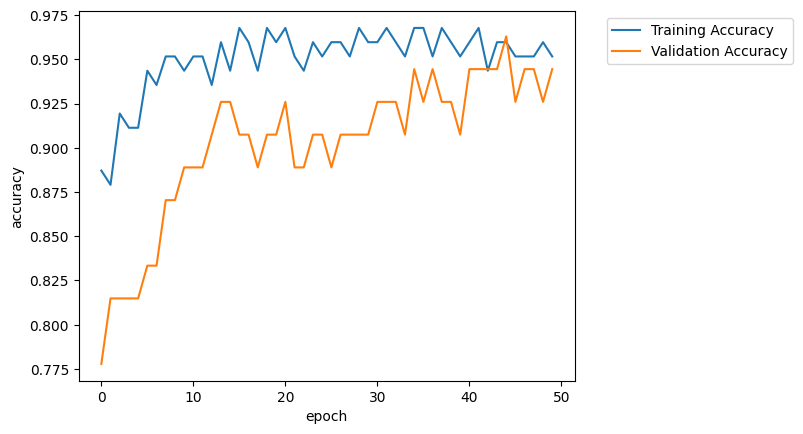

In [ ]:
plt.plot(history.history["accuracy"],label="Training Accuracy")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

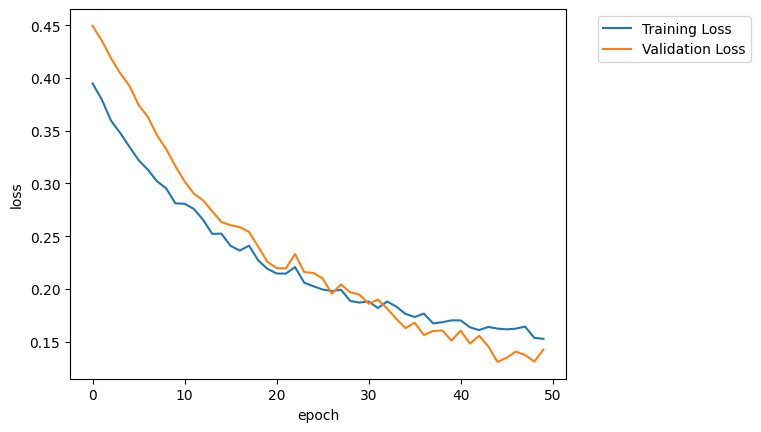

In [ ]:
plt.plot(history.history["loss"],label="Training Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

## Train the model with Adadelta

In [ ]:
# Compile the model
model.compile(
    optimizer=keras.optimizers.Adadelta(0.01),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Train the model with class_weight argument
history = model.fit(
    train_features,
    train_targets,
    epochs=50,
    verbose=2,
    validation_data=(val_features, val_targets),
)

Epoch 1/50
4/4 - 1s - 338ms/step - accuracy: 0.9677 - loss: 0.1465 - val_accuracy: 0.9444 - val_loss: 0.1425
Epoch 2/50
4/4 - 0s - 17ms/step - accuracy: 0.9677 - loss: 0.1465 - val_accuracy: 0.9444 - val_loss: 0.1424
Epoch 3/50
4/4 - 0s - 34ms/step - accuracy: 0.9677 - loss: 0.1465 - val_accuracy: 0.9444 - val_loss: 0.1424
Epoch 4/50
4/4 - 0s - 34ms/step - accuracy: 0.9677 - loss: 0.1464 - val_accuracy: 0.9444 - val_loss: 0.1423
Epoch 5/50
4/4 - 0s - 16ms/step - accuracy: 0.9677 - loss: 0.1464 - val_accuracy: 0.9444 - val_loss: 0.1423
Epoch 6/50
4/4 - 0s - 20ms/step - accuracy: 0.9677 - loss: 0.1464 - val_accuracy: 0.9444 - val_loss: 0.1423
Epoch 7/50
4/4 - 0s - 20ms/step - accuracy: 0.9677 - loss: 0.1464 - val_accuracy: 0.9444 - val_loss: 0.1422
Epoch 8/50
4/4 - 0s - 30ms/step - accuracy: 0.9677 - loss: 0.1463 - val_accuracy: 0.9444 - val_loss: 0.1422
Epoch 9/50
4/4 - 0s - 19ms/step - accuracy: 0.9677 - loss: 0.1463 - val_accuracy: 0.9444 - val_loss: 0.1421
Epoch 10/50
4/4 - 0s - 40ms

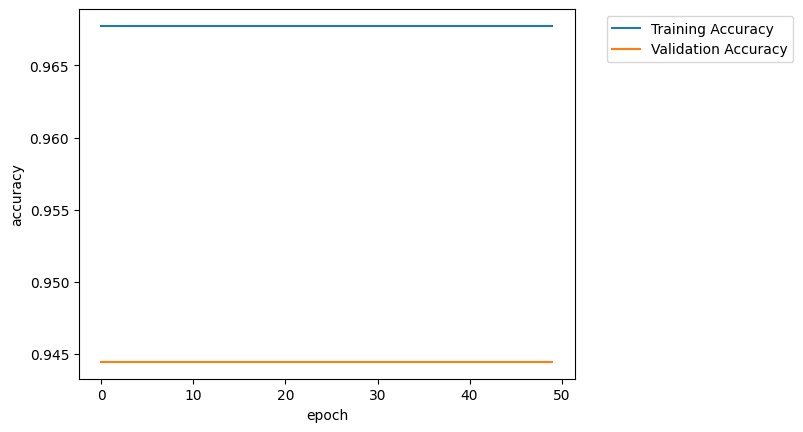

In [ ]:
plt.plot(history.history["accuracy"],label="Training Accuracy")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

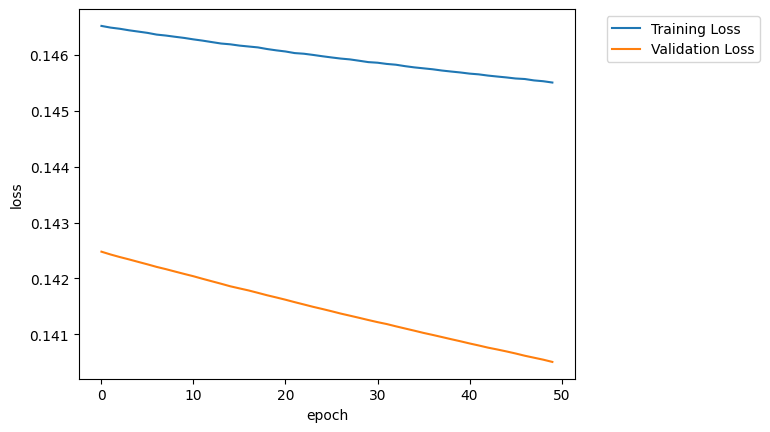

In [ ]:
plt.plot(history.history["loss"],label="Training Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()